In [1]:
!pip install plotly
!pip install kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import kaleido

In [3]:
# Load and read the Excel data
file_path = "/Users/elchulito/Library/CloudStorage/OneDrive-polymtl/PlasticFADE.xlsx"  # CHECK: confirm file path
sheet_name = "Sankey"
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols='K', skiprows=1)
values = df.iloc[:, 0].tolist()  # Convert the column data to a list of values
pd.set_option('display.float_format', '{:.3f}'.format)  # Display all floats in 3 decimal digits

df_PS_Beach = df.iloc[0:9]
df_PS_WSur = df.iloc[9:18]
print(df_PS_Beach, "\n", df_PS_WSur)

   Value [kg].1
0         2.502
1        62.742
2        34.757
3         0.063
4         1.570
5         0.870
6        40.935
7        21.807
8        34.757 
     Value [kg].1
9         82.049
10         0.370
11        17.582
12        67.320
13         0.303
14        14.425
15         0.305
16         0.065
17        17.582


[ 2.502 62.742 34.757  0.063  1.57   0.87  40.935 21.807 34.757]


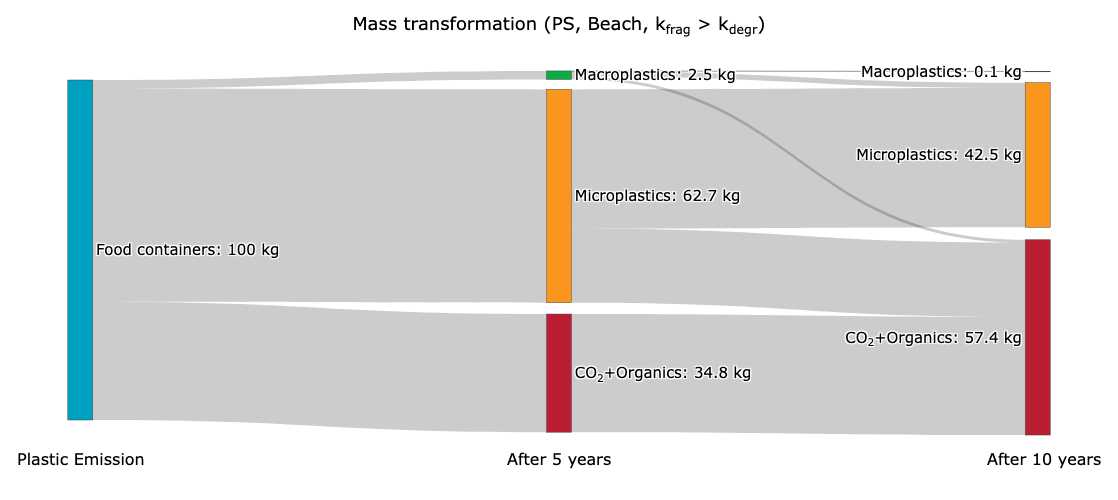

In [9]:
# Sankey diagram for PS, Beach
# Manually add text to be shown on the plot
node_labels = ["Food containers: 100 kg", "Macroplastics: 2.5 kg", "Microplastics: 62.7 kg", "CO<sub>2</sub>+Organics: 34.8 kg", 
               "Macroplastics: 0.1 kg", "Microplastics: 42.5 kg", "CO<sub>2</sub>+Organics: 57.4 kg"]
node_colors = ['#00A1C0', '#0BAC43', '#FA961E', '#B91E32', '#0BAC43', '#FA961E', '#B91E32']

# Define sources, targets, and values for the Sankey diagram
source_nodes = [0, 0, 0, 1, 1, 1, 2, 2, 3]
target_nodes = [1, 2, 3, 4, 5, 6, 5, 6, 6]
link_values = df_PS_Beach.iloc[:, 0].values
np.set_printoptions(precision=3, suppress=True)
print(link_values)

# Calculate node values (sum of links for each node)
node_values = [0] * len(node_labels)
for i in range(len(source_nodes)):
    node_values[source_nodes[i]] += link_values[i]
    node_values[target_nodes[i]] += link_values[i]

# Format node labels with values (rounded to one decimal place and suffixed with 'kg')
formatted_labels = [f"{label}: {value:.1f} kg" for label, value in zip(node_labels, node_values)]

# Custom node positions: set 'x' and 'y' positions (adjust y for a better-looking plot)
x_positions = [0.06, 0.5, 0.5, 0.5, 0.94, 0.94, 0.94]  # x positions: left, middle, right
y_positions = [0.5, 0.04, 0.358, 0.824, 0.03, 0.25, 0.73]  # y positions: control vertical alignment (change manually)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        # pad=20,  # Space between nodes
        thickness=25,  # Node thickness
        label=node_labels,
        x=x_positions,
        y=y_positions,
        color=node_colors  # Node color
    ),
    link=dict(
        source=source_nodes,  # Source nodes
        target=target_nodes,  # Target nodes
        value=df_PS_Beach     # Link values
    )
)])

# Add annotations at positions 0.05, 0.5, 0.95
fig.add_annotation(
    x=0, y=-0.08,
    text="Plastic Emission",
    showarrow=False,
    font=dict(size=16),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=0.5, y=-0.08,
    text="After 5 years",
    showarrow=False,
    font=dict(size=16),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=1, y=-0.08,
    text="After 10 years",
    showarrow=False,
    font=dict(size=16),
    xref="paper", yref="paper"
)

# Update layout
fig.update_layout(
    title=dict(
        text="Mass transformation (PS, Beach, k<sub>frag</sub> > k<sub>degr</sub>)",
        x=0.5,
        xanchor='center',
        font=dict(size=18)
    ),
    font=dict(size=15, color="black"),
    width=1000,  # Set width in pixels
    height=500,  # Set height in pixels
    margin=dict(l=15, r=15, t=60, b=60), # Adjust bottom margin for annotations
)

fig.write_image("/Users/elchulito/Sankey_PS_Beach.png", width=1000, height=500, scale=6)  # CHECK: confirm name and desired place for the plot
fig.show()

[82.049  0.37  17.582 67.32   0.303 14.425  0.305  0.065 17.582]


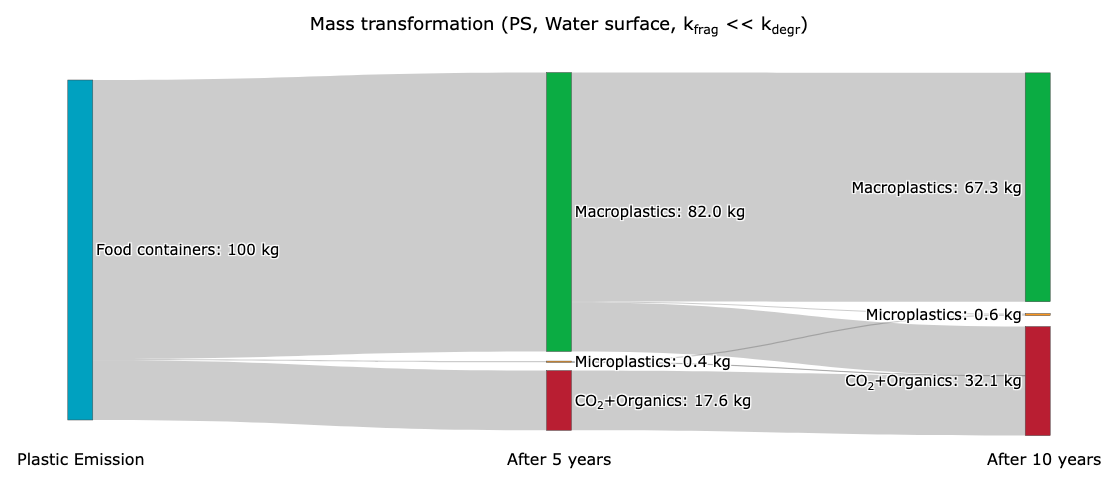

In [15]:
# Sankey diagram for PS, Water surface
# Manually add text to be shown on the plot
node_labels = ["Food containers: 100 kg", "Macroplastics: 82.0 kg", "Microplastics: 0.4 kg", "CO<sub>2</sub>+Organics: 17.6 kg", 
               "Macroplastics: 67.3 kg", "Microplastics: 0.6 kg", "CO<sub>2</sub>+Organics: 32.1 kg"]
node_colors = ['#00A1C0', '#0BAC43', '#FA961E', '#B91E32', '#0BAC43', '#FA961E', '#B91E32']

# Define sources, targets, and values for the Sankey diagram
source_nodes = [0, 0, 0, 1, 1, 1, 2, 2, 3]
target_nodes = [1, 2, 3, 4, 5, 6, 5, 6, 6]
link_values = df_PS_WSur.iloc[:, 0].values
np.set_printoptions(precision=3, suppress=True)
print(link_values)

# Calculate node values (sum of links for each node)
node_values = [0] * len(node_labels)
for i in range(len(source_nodes)):
    node_values[source_nodes[i]] += link_values[i]
    node_values[target_nodes[i]] += link_values[i]

# Format node labels with values (rounded to one decimal place and suffixed with 'kg')
formatted_labels = [f"{label}: {value:.1f} kg" for label, value in zip(node_labels, node_values)]

# Custom node positions: set 'x' and 'y' positions (adjust y for a better-looking plot)
x_positions = [0.06, 0.5, 0.5, 0.5, 0.94, 0.94, 0.94]  # x positions: left, middle, right
y_positions = [0.5, 0.4, 0.794, 0.896, 0.335, 0.67, 0.845]  # y positions: control vertical alignment (change manually)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        # pad=20,  # Space between nodes
        thickness=25,  # Node thickness
        label=node_labels,
        x=x_positions,
        y=y_positions,
        color=node_colors  # Node color
    ),
    link=dict(
        source=source_nodes,  # Source nodes
        target=target_nodes,  # Target nodes
        value=df_PS_WSur     # Link values
    )
)])

# Add annotations at positions 0.05, 0.5, 0.95
fig.add_annotation(
    x=0, y=-0.08,
    text="Plastic Emission",
    showarrow=False,
    font=dict(size=16),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=0.5, y=-0.08,
    text="After 5 years",
    showarrow=False,
    font=dict(size=16),
    xref="paper", yref="paper"
)
fig.add_annotation(
    x=1, y=-0.08,
    text="After 10 years",
    showarrow=False,
    font=dict(size=16),
    xref="paper", yref="paper"
)

# Update layout
fig.update_layout(
    title=dict(
        text="Mass transformation (PS, Water surface, k<sub>frag</sub> << k<sub>degr</sub>)",
        x=0.5,
        xanchor='center',
        font=dict(size=18)
    ),
    font=dict(size=15, color="black"),
    width=1000,  # Set width in pixels
    height=500,  # Set height in pixels
    margin=dict(l=15, r=15, t=60, b=60), # Adjust bottom margin for annotations
)

fig.write_image("/Users/elchulito/Sankey_PS_WSur.png", width=1000, height=500, scale=6)  # CHECK: confirm name and desired place for the plot
fig.show()